# Trainig a simple graph



In these notes, I train a simple graph (Figure above) to give a desired value as output on node 1 fixing voltage on node 0, $V_0$ = 0V, and voltage at node 2, $V_2$ = 5V.
Sections:
- REPRODUCING RESULTS
- INTRODUCING NOISE
- COMPARISON BETWEEN DISCRETE AND CONTINUOUS RULE

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import plotting_functions
import graphs
import training


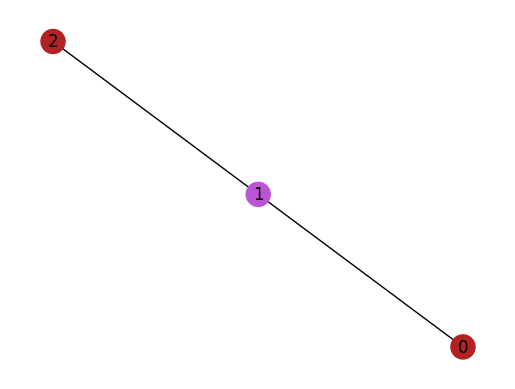

In [3]:
# Choose the graph: select desired parameters 
G = graphs.simple_graph(save_data=True)
fig, ax = plt.subplots()
plotting_functions.plot_graph(ax, fig, 'simple_graph')

# Don't change the graph G itself here below

## Reproducing results

I first reproduce the results to the ones in the paper of [Dillavou]. Here, they update the resistances on the network using an approximation to the coupled learning rule that stems from experimental limitations. In fact, they have discrete variable resistors so they fix the resistance update increment to $\delta R$.
To analyze, I plot the value of the voltage given as output by the network in the free state and compare it with the value of the voltage imposed in the constrained as well as with the desired voltage. 
I also show the behaviour of the resistances on the two edges, edge A connecting node 0-1 and egde B connecting node 1-2.

To check the status of the training, we show here the behaviour of the mean-squared error (MSE) as a function of training steps. It is defined as[]

$C = \frac{1}{2} \sum_{T} \left( V_{T}^{F} - V_{T} \right)$

General Parameters: 

iterations: 50, tollerance on potential difference= 1e-16 

Parameters Resistance Update: 

eta_r = 0.5, alpha_r = 5000.0, gamma_r = 10000.0, initial resistance=50 

Parameters Conductance Update: 

eta_c = 0.001, alpha_c = 0.0005, gamma_c = 0.5, initial conductances=0.02 



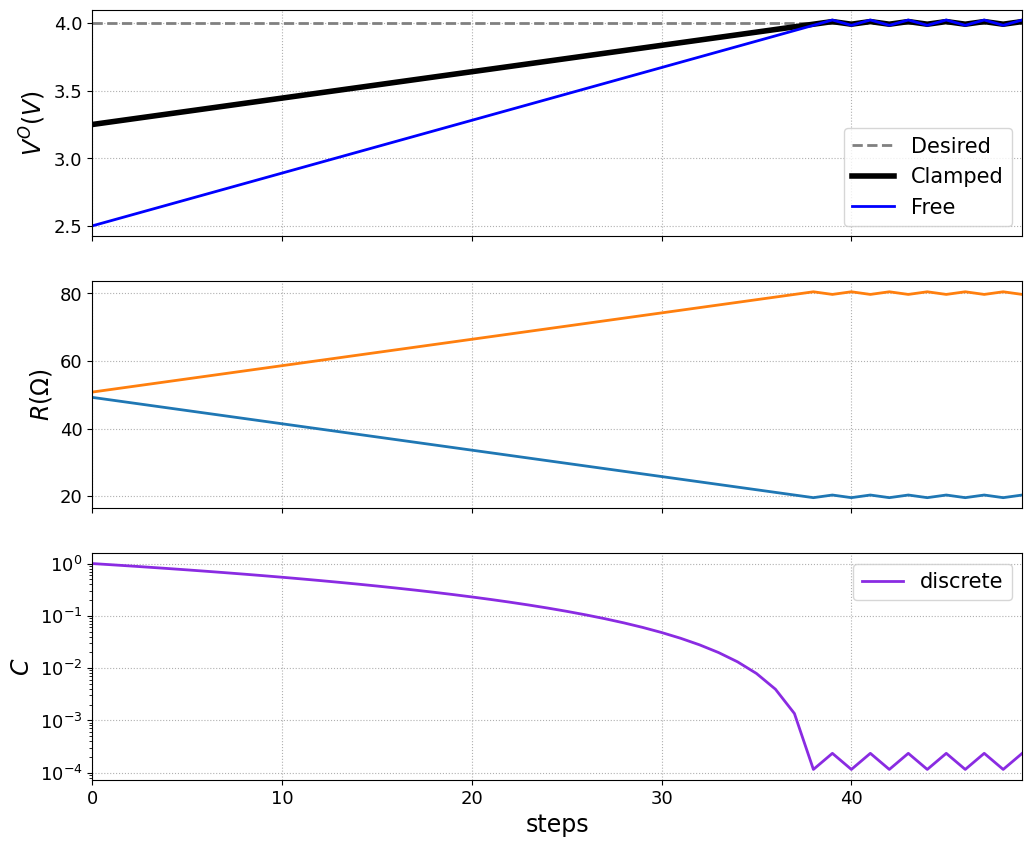

In [55]:
G_train = G.copy(as_view=False)
G_train = training.training_epoch(G_train, rule = 'discrete', update = 'resistances', mse=True, resistances_change=True, voltages_simple=True, show_parameters=True)
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'discrete',update = 'resistances')
plotting_functions.plot_resistances(ax[1], G1, rule = 'discrete')
plotting_functions.plot_mse(ax[2], fig, rule = 'discrete', update = 'resistances', zoom_in=0)

Here I want to train the system to give 4V at node 1. The error gets significantly decreased, but the system gets stuck in a configuration where it can not decrease error further. This is due to the fact the the discrete increment of the resistances is too big compared to the difference between the free and clamped state.

Comparing with the results in the paper [FIG. 2 (b)], I see similar results. However, they also introduce noise here treated in the next section.

## Introducing noise

Experimentally, the noise would come from a wrong measurement of the potentials in free $\Delta V^{F}$ and clamped states $\Delta V^{C}$. This, in turn, affects the choise in the sign of the update when the magnitude of the error in the measurement is comparable with the magnitude of $\Delta V = \Delta V^{C} - \Delta V^{F}$.

Looking above, the network gets stuck in two configurations, from one it gets trained to another and vice-versa. I printed the number of steps and the difference in potential to understand for what value of $\Delta V$ this happens. I saw that happens when $\Delta V \sim 0.01$. In the paper, they found that this also corresponds to the experimental value when the noise is dominant. To simulate the noise, theupdating rule gets modified in such a way that a random variable is added to the difference in the potentials 
$ \Delta V^{C} - \Delta V^{F} + \sigma$
with $\sigma$ a random variable with uniform distribution of width 2*0.01 and ceneterd in zero. In this way, if the difference in potential is smaller than 0.01, than the $\sigma$ has 50% probability of changing its sign. Here below the results with noise.

General Parameters: 

iterations: 100, tollerance on potential difference= 1e-16 

Parameters Resistance Update: 

eta_r = 0.5, alpha_r = 5000.0, gamma_r = 10000.0, initial resistance=50 

Parameters Conductance Update: 

eta_c = 0.001, alpha_c = 0.0005, gamma_c = 0.5, initial conductances=0.02 



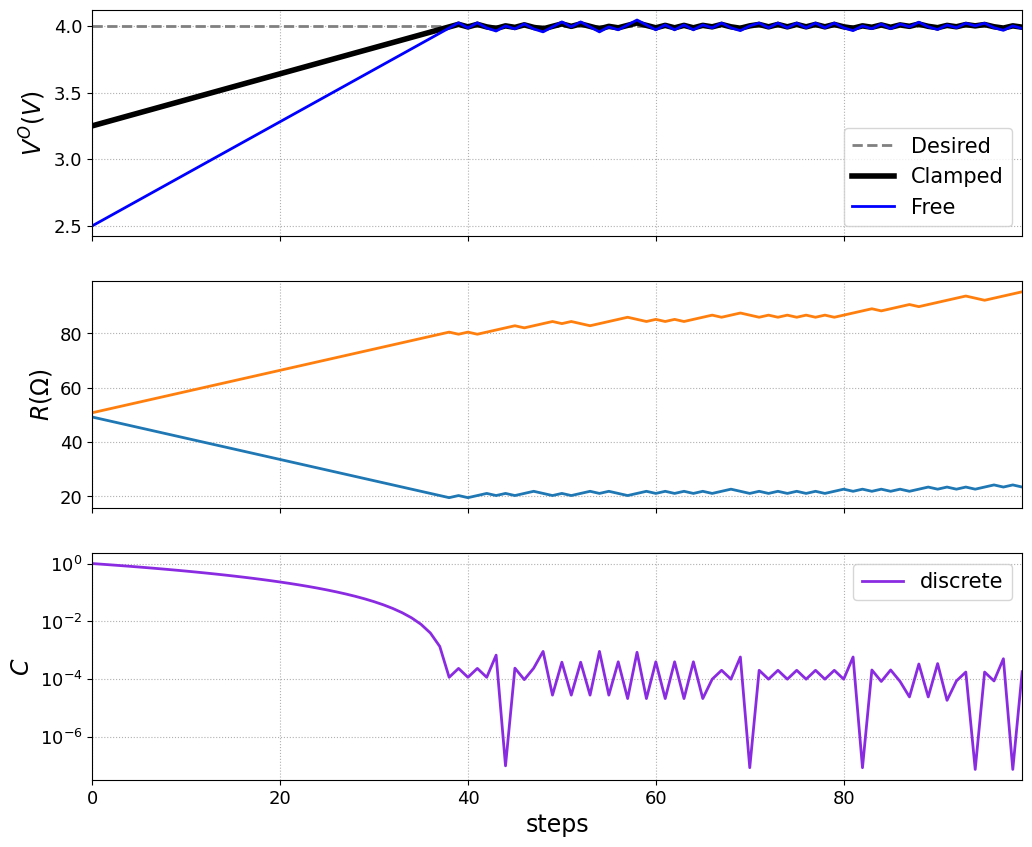

In [70]:
G_train = G.copy(as_view=False)
G_train = training.training_epoch(G_train, rule = 'discrete', update = 'resistances', mse=True, resistances_change=True, voltages_simple=True, show_parameters=True, noise=True)
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'discrete',update = 'resistances')
plotting_functions.plot_resistances(ax[1], G1, rule = 'discrete')
plotting_functions.plot_mse(ax[2], fig, rule = 'discrete', update = 'resistances', zoom_in=0)

The advantage of adding noise it that it enables to get out of stck configurations and explore the solution space more. However, a part from some lucky events that significantly decrease the error (look at the C going to $10^{-6}$), the error in the generation of the desired output remain of the same order of magnitude in general.

## Comparison between continuous and discrete rules

We train the graph using two types of updating rules. The coninous rule from coupled learning and the discrete rule in [Dillavou] which is motivated by experimantal results. The implementation of the latter is done to be able to validate the simulation code.

The goal in this poject is to construct a physical system that is able to implement the countinuous rule. Therefore, here I will make a comparison between the experimental system available today (in the paper) and the one we would like to construct.

In [4]:
# Train the graph
G1 = G.copy(as_view=False)
G2 = G.copy(as_view=False)
G1 = training.training_epoch(G1, rule = 'discrete', update = 'resistances', mse=True, resistances_change=True, voltages_simple=True, noise=True)
G2 = training.training_epoch(G2, rule = 'continuous', update = 'resistances', mse=True, resistances_change=True, voltages_simple=True)

-10.500001359730952
19.50000103190532
-7.316383541813115
6.0412881989215705
-5.9442826912789
3.2475945874566863
-4.069640916779953
1.5554678845136691
-1.721380427850974
0.4986599987235055
-0.22541081748024883
0.057348499048946
0.00211966910019988
-0.0005299222950751574
-6.2047588049308e-05
1.5420895577299547e-05
6.740414455502207e-06
-1.7761752205168243e-06
-6.260006557272448e-06
1.4739299246821539e-06
2.23008648022513e-06
-6.485934274742855e-07
4.528425736566689e-06
-1.223178411494912e-06
-1.48494836858106e-06
2.8016524733615425e-07
-2.0016656663254966e-06
4.093445297377946e-07
1.5877109441863699e-06
-4.879997172076395e-07
1.1662422833175506e-08
-9.39875725452722e-08
6.871709154279192e-07
-2.628647260121515e-07
-3.538281130208617e-06
7.934984450737422e-07
1.7399462521240496e-06
-5.260584863585195e-07
1.8194827890145987e-06
-5.459427032642383e-07
6.40642427393884e-07
-2.512326115166076e-07
-4.776934836940377e-06
1.1031619550141643e-06
2.8191924153083502e-06
-7.95869973983665e-07
3.0313

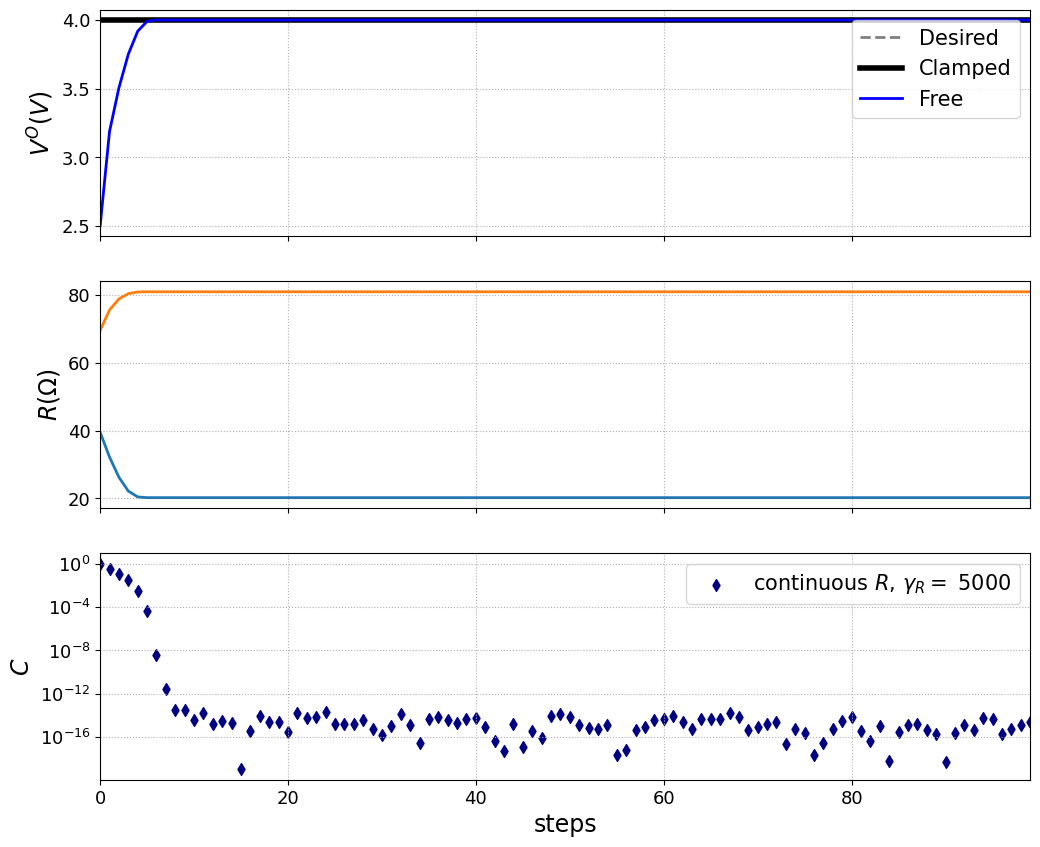

In [5]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'continuous', update = 'resistances')
plotting_functions.plot_resistances(ax[1], G2, rule = 'continuous')
plotting_functions.plot_mse(ax[2], fig, rule = 'continuous', update = 'resistances', zoom_in=0, scatter=True)

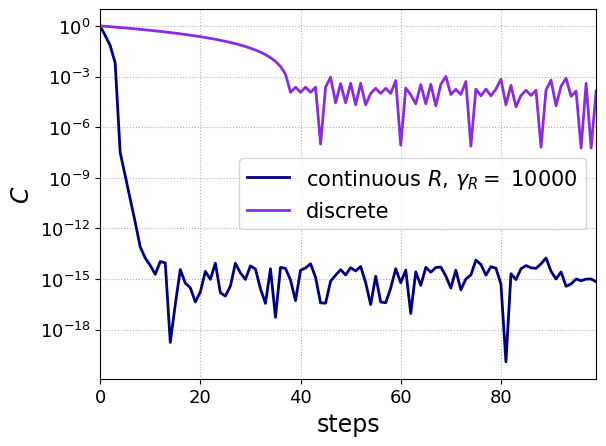

In [88]:
fig, ax = plt.subplots()
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update = 'resistances', zoom_in=0)
plotting_functions.plot_mse(ax, fig, rule = 'discrete', update = 'resistances', zoom_in=0)

In [82]:
print(G1.nodes[1]['voltage'])
print(G2.nodes[1]['voltage'])

4.029043626751918
3.999999990063065


## Updating conductances instead

Is updating resistance $R$ or conductance $g=1/R$ the same in the continuous version of the rule?

In [117]:
G3 = G.copy(as_view=False)
G4 = G.copy(as_view=False)
G3 = training.training_epoch(G3, rule = 'continuous', update = 'resistances', mse=True, 
                             resistances_change=True, voltages_simple=True, 
                             show_parameters=True)
G4 = training.training_epoch(G4, rule = 'continuous', update = 'conductances', mse=True, 
                             voltages_simple=True, conductances_change = True)

General Parameters: 

iterations: 50, tollerance on potential difference= 1e-16 

Parameters Resistance Update: 

eta_r = 0.5, alpha_r = 5000.0, gamma_r = 10000.0, initial resistance=50 

Parameters Conductance Update: 

eta_c = 0.001, alpha_c = 0.0005, gamma_c = 0.5, initial conductances=0.02 

step 0
-0.029991004349508188
0.03000870270858158
step 1
-0.029978988897804256
0.02996069114291364
step 2
-0.029966998744436067
0.029912808172470166
step 3
-0.02995502617174421
0.029865051276490084
step 4
-0.029943073943667634
0.029817420571804604
step 5
-0.029931137397349924
0.029769914308548893
step 6
-0.029919221264863582
0.02972253310925145
step 7
-0.029907324643722
0.029675276179238715
step 8
-0.029895444595179368
0.029628142211593052
step 9
-0.029883583884441154
0.029581131346679227
step 10
-0.029871740825153696
0.029534242600855996
step 11
-0.029859917228658724
0.029487475881689863
step 12
-0.029848111107258664
0.029440830135207194
step 13
-0.029836324541911693
0.029394305345981697
step 1

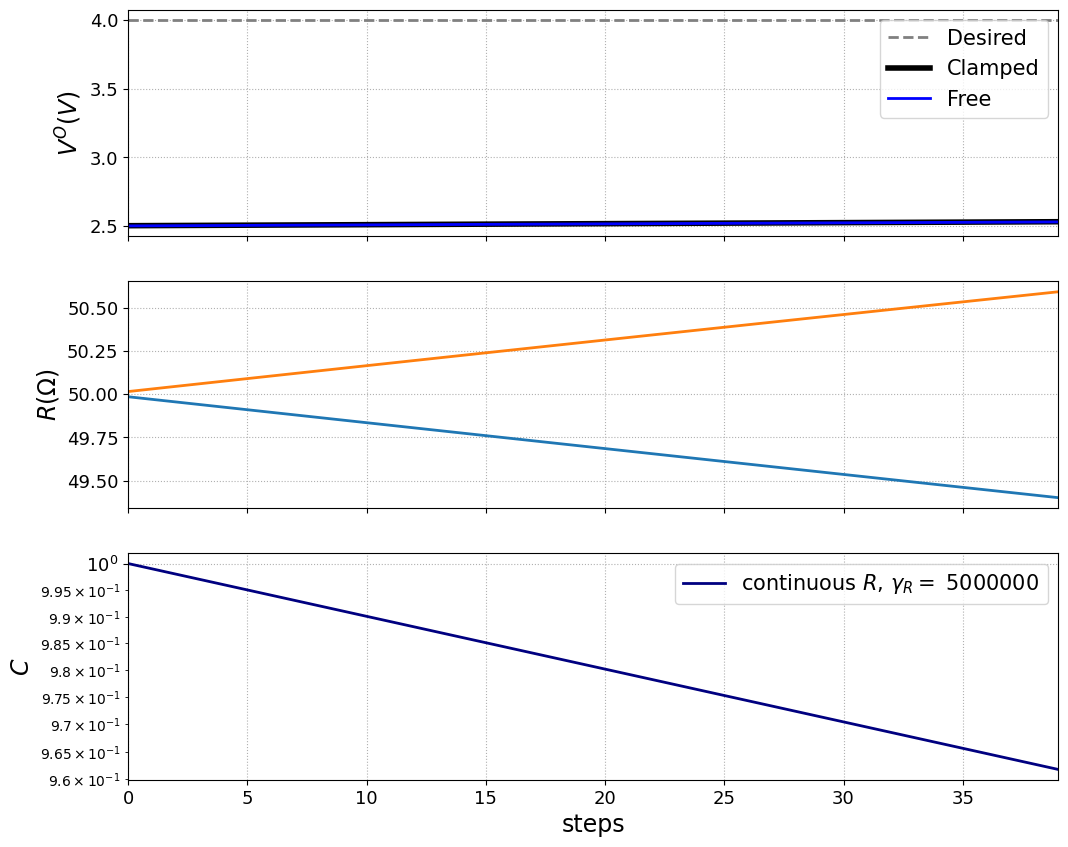

In [21]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'continuous', update = 'resistances')
plotting_functions.plot_resistances(ax[1], G3, rule = 'continuous')
plotting_functions.plot_mse(ax[2], fig, rule = 'continuous', update = 'resistances', zoom_in=0)

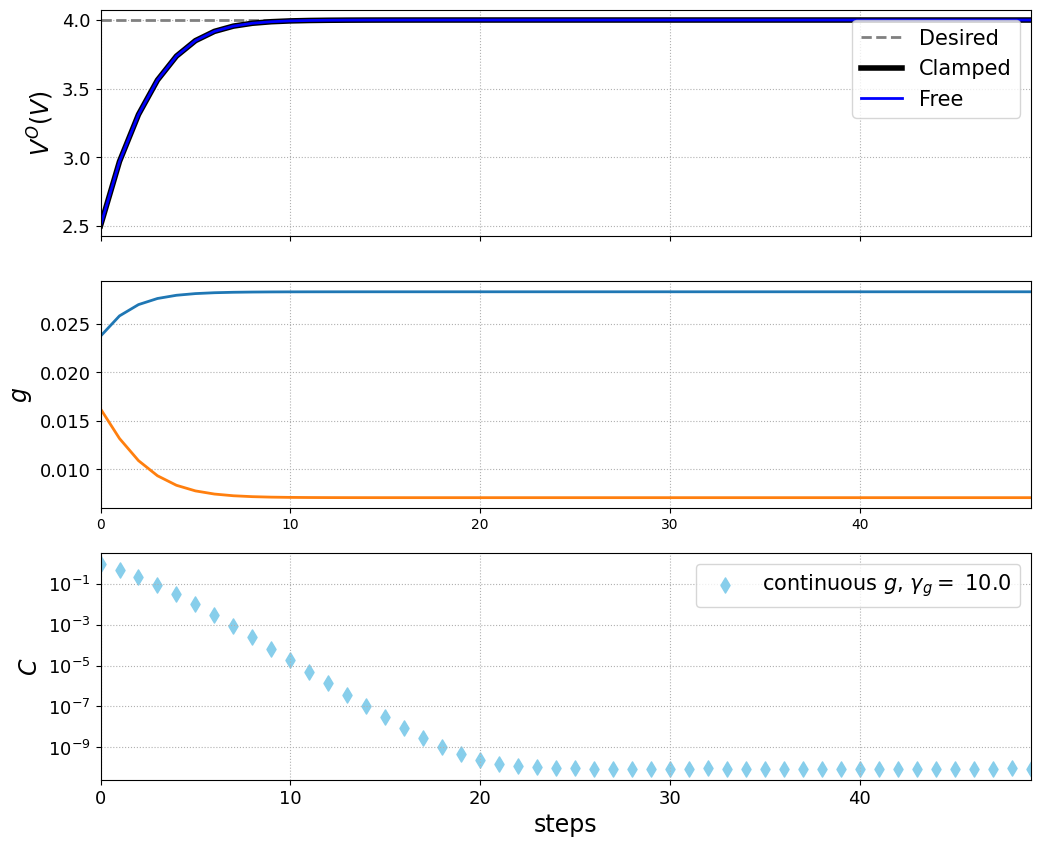

In [118]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'continuous', update = 'conductances')
plotting_functions.plot_conductaces(ax[1], G4)
plotting_functions.plot_mse(ax[2], fig, rule = 'continuous', update = 'conductances', 
                            zoom_in=0, scatter=True) 

In [84]:
G7 = G.copy(as_view=False)
G7 = training.training_epoch(G7, rule = 'discrete', update = 'conductances', mse=True, 
                             voltages_simple=True, conductances_change = True)

step 0
ello2 (0, 1)
ello (2, 1) 0.0005
0.02
0.0195
step 1
ello2 (0, 1)
ello (2, 1) 0.0005
0.0195
0.019
step 2
ello2 (0, 1)
ello (2, 1) 0.0005
0.019
0.0185
step 3
ello2 (0, 1)
ello (2, 1) 0.0005
0.0185
0.018
step 4
ello2 (0, 1)
ello (2, 1) 0.0005
0.018
0.017499999999999998
step 5
ello2 (0, 1)
ello (2, 1) 0.0005
0.017499999999999998
0.016999999999999998
step 6
ello2 (0, 1)
ello (2, 1) 0.0005
0.016999999999999998
0.016499999999999997
step 7
ello2 (0, 1)
ello (2, 1) 0.0005
0.016499999999999997
0.015999999999999997
step 8
ello2 (0, 1)
ello (2, 1) 0.0005
0.015999999999999997
0.015499999999999996
step 9
ello2 (0, 1)
ello (2, 1) 0.0005
0.015499999999999996
0.014999999999999996
step 10
ello2 (0, 1)
ello (2, 1) 0.0005
0.014999999999999996
0.014499999999999996
step 11
ello2 (0, 1)
ello (2, 1) 0.0005
0.014499999999999996
0.013999999999999995
step 12
ello2 (0, 1)
ello (2, 1) 0.0005
0.013999999999999995
0.013499999999999995
step 13
ello2 (0, 1)
ello (2, 1) 0.0005
0.013499999999999995
0.0129999999999

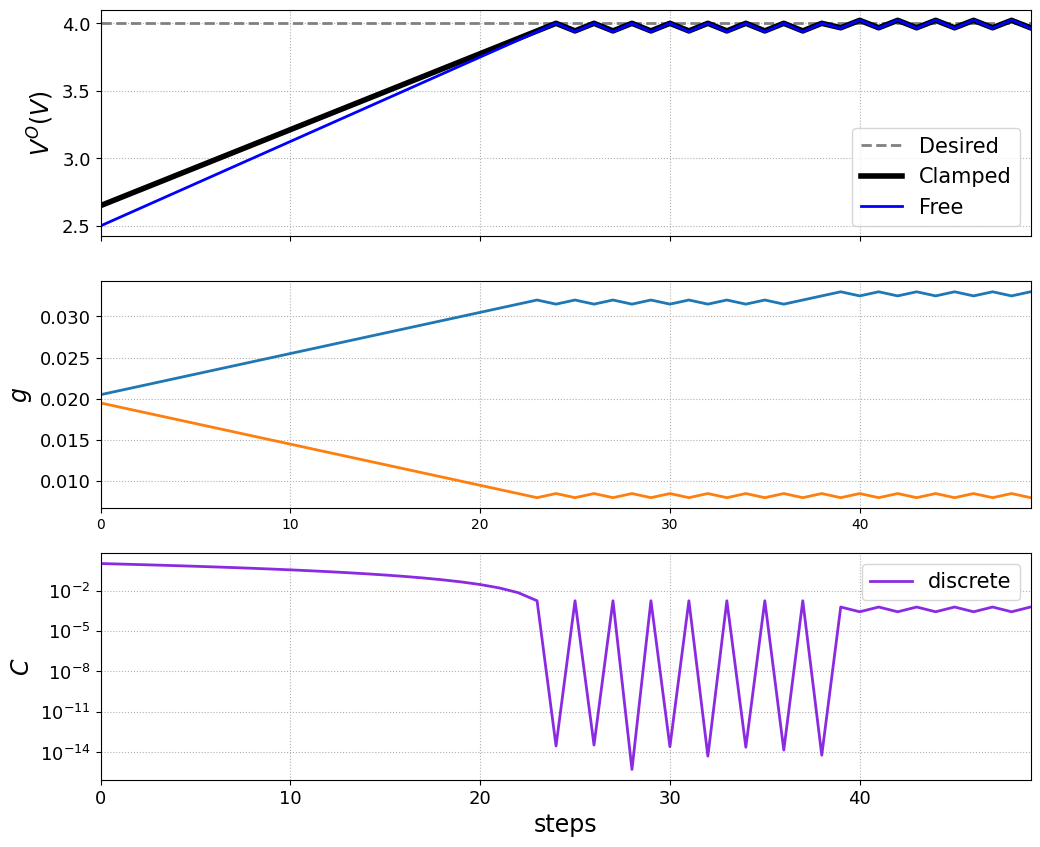

In [85]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'discrete', update = 'conductances')
plotting_functions.plot_conductaces(ax[1], G4)
plotting_functions.plot_mse(ax[2], fig, rule = 'discrete', update = 'conductances', 
                            zoom_in=0, scatter=True) 

In [ ]:
G7 = G.copy(as_view=False)
G7 = training.training_epoch(G7, rule = 'discrete', update = 'conductances', mse=True, 
                             voltages_simple=True, conductances_change = True, noise=True)

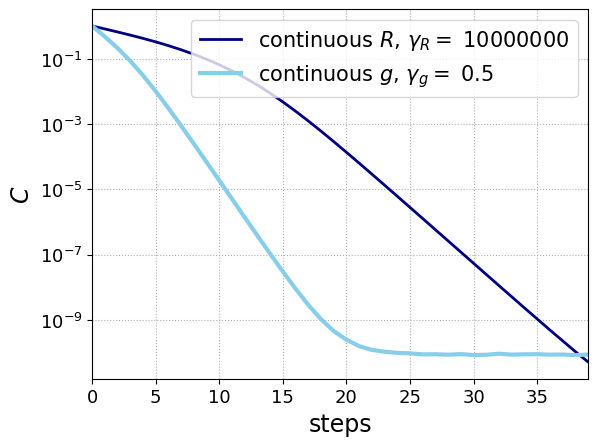

In [39]:
fig, ax = plt.subplots()
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='resistances', zoom_in=0)
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='conductances', zoom_in=0)

## Introducing a new updating rule

step 0
0.0037488755436885235
-0.0037510878385726976
step 1
0.0020941229999706934
-0.0030619654112822303
step 2
0.0011642852325068898
-0.0022823510784837353
step 3
0.0006300299968442502
-0.0015606683929414444
step 4
0.0003326427983592062
-0.0009839671578140141
step 5
0.00017321873539655197
-0.0005795306364211328
step 6
8.978432598782948e-05
-0.0003247231429508446
step 7
4.6531888751477624e-05
-0.00017615080216071277
step 8
2.4142822284467513e-05
-9.373174588134248e-05
step 9
1.2541815851530025e-05
-4.934086031038731e-05
step 10
6.522548020915231e-06
-2.5820798828846137e-05
step 11
3.3966308166100134e-06
-1.3469699939427926e-05
step 12
1.7724959530118767e-06
-7.014759697554496e-06
step 13
9.27708530107374e-07
-3.6469499766766944e-06
step 14
4.894408724975818e-07
-1.8969700281701307e-06
step 15
2.6130837693649767e-07
-9.852916313946025e-07
step 16
1.4270267623128774e-07
-5.111064114160513e-07
step 17
8.061836420658608e-08
-2.628375197488708e-07
step 18
4.870434344717012e-08
-1.35201590367

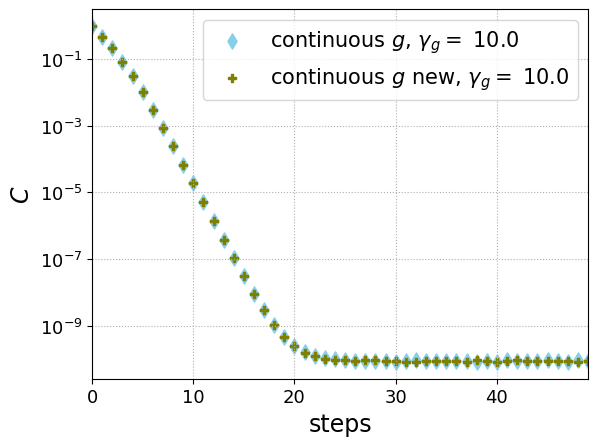

In [115]:
G5 = G.copy(as_view=False)
G6 = G.copy(as_view=False)
fig, ax = plt.subplots()
G5 = training.training_epoch(G5, rule = 'continuous', update = 'conductances', mse=True, 
                             voltages_simple=False, conductances_change = True)
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='conductances', zoom_in=0,
                            scatter=True)
G6 = training.training_epoch(G6, rule = 'continuous', update = 'conductances', mse=True, 
                             voltages_simple=False, conductances_change = True, new_rule=True)
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='conductances', zoom_in=0, 
                            new_rule=True, scatter=True)

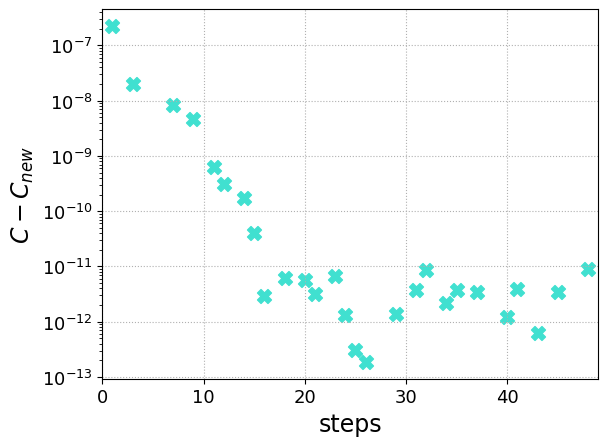

In [116]:
fig, ax = plt.subplots()
plotting_functions.difference_mse(ax)

## Introducing noise

Experimentally, the noise would come from a wrong measurement of the difference in potential in free $\Delta V^{F}$ and clamped states $\Delta V^{C}$. 

Looking above, the network gets stuck in two configurations, from one it gets trained to another and vice-versa. I printed the number of step and the difference in potential to understand for what value of $\Delta V = \Delta V^{C} - \Delta V^{F}$ this happens. I saw that happens for $\Delta V \sim 0.01$

In [28]:
# Train the graph

G1 = G.copy()
G2 = G.copy()

G1 = training.training_epoch(G1, rule = 'discrete', mse=True, update='resistances',
                             resistances_change=True, voltages_simple=True, noise=False)
G2 = training.training_epoch(G2, rule = 'continuous', mse=True, update='resistances',
                             resistances_change=True, voltages_simple=True, noise=False)


step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31
step 32
step 33
step 34
step 35
step 36
step 37
step 38
step 39
step 40
step 41
step 42
step 43
step 44
step 45
step 46
step 47
step 48
step 49
step 0
-0.029991004349508188
0.03000870270858158
step 1
-0.029978988897804256
0.02996069114291364
step 2
-0.029966998744436067
0.029912808172470166
step 3
-0.02995502617174421
0.029865051276490084
step 4
-0.029943073943667634
0.029817420571804604
step 5
-0.029931137397349924
0.029769914308548893
step 6
-0.029919221264863582
0.02972253310925145
step 7
-0.029907324643722
0.029675276179238715
step 8
-0.029895444595179368
0.029628142211593052
step 9
-0.029883583884441154
0.029581131346679227
step 10
-0.029871740825153696
0.029534242600855996
step 11
-0.029859917228658724
0.029487475881689863
step 12
-0.0298

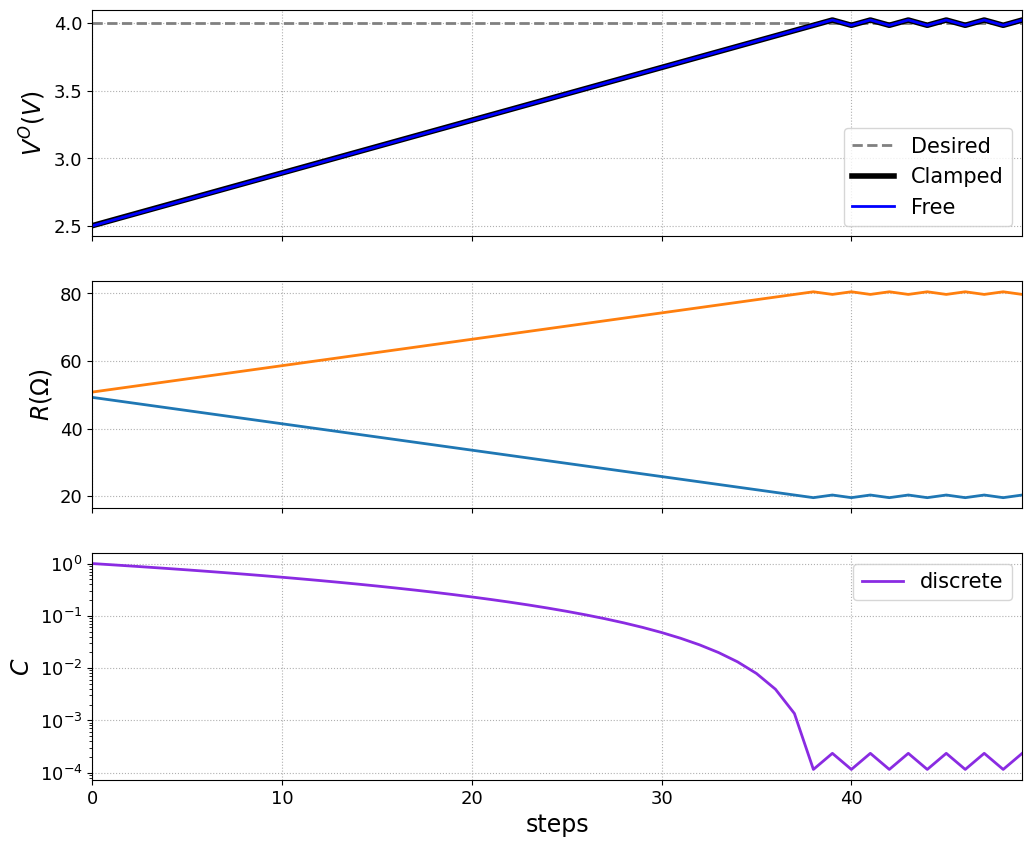

In [29]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'discrete', update='resistances')
plotting_functions.plot_resistances(ax[1], G1, rule = 'discrete')
plotting_functions.plot_mse(ax[2], fig, rule = 'discrete', update='resistances', zoom_in=0)

TypeError: plot_mse() missing 1 required positional argument: 'zoom_in'

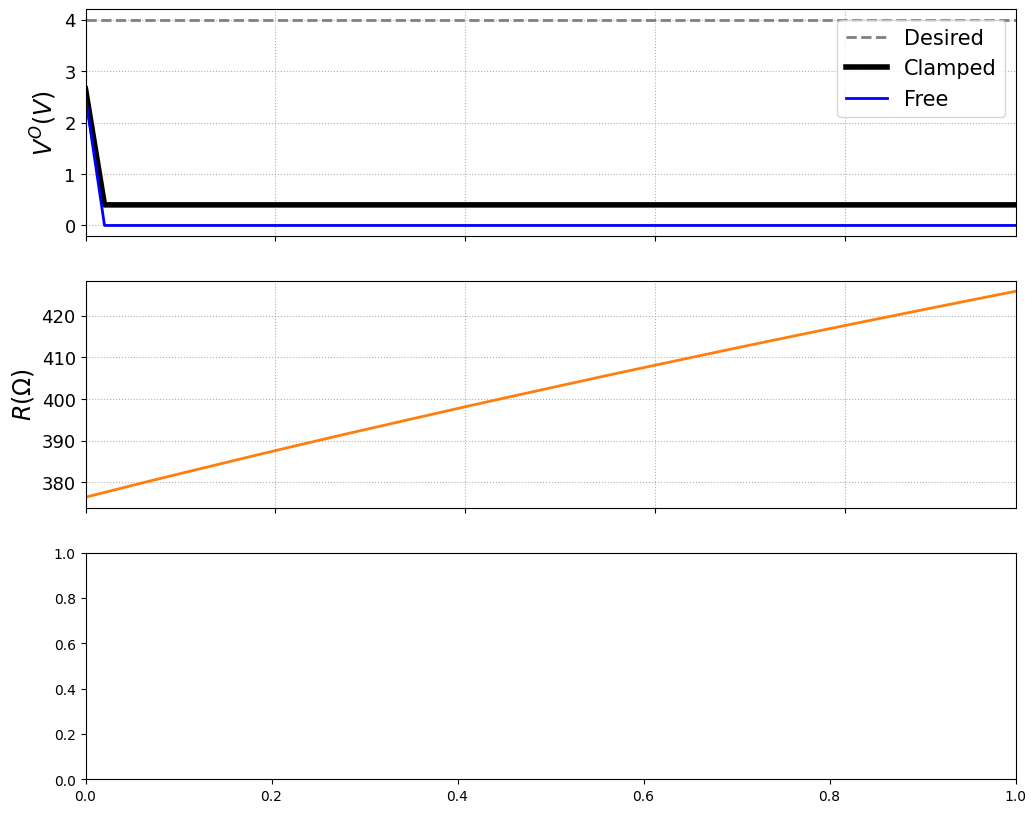

In [94]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'continuous', update='resistances')
plotting_functions.plot_resistances(ax[1], G2, rule = 'continuous')
plotting_functions.plot_mse(ax[2], fig, rule = 'continuous', update='resistances')

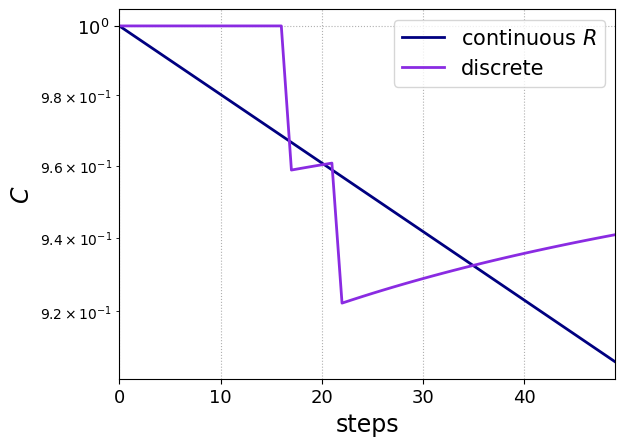

In [124]:
fig, ax = plt.subplots()
plotting_functions.plot_mse(ax, fig, rule = 'continuous', update='resistances', zoom_in=0)
plotting_functions.plot_mse(ax, fig, rule = 'discrete', update='resistances', zoom_in=0)

----------------------------------------------------

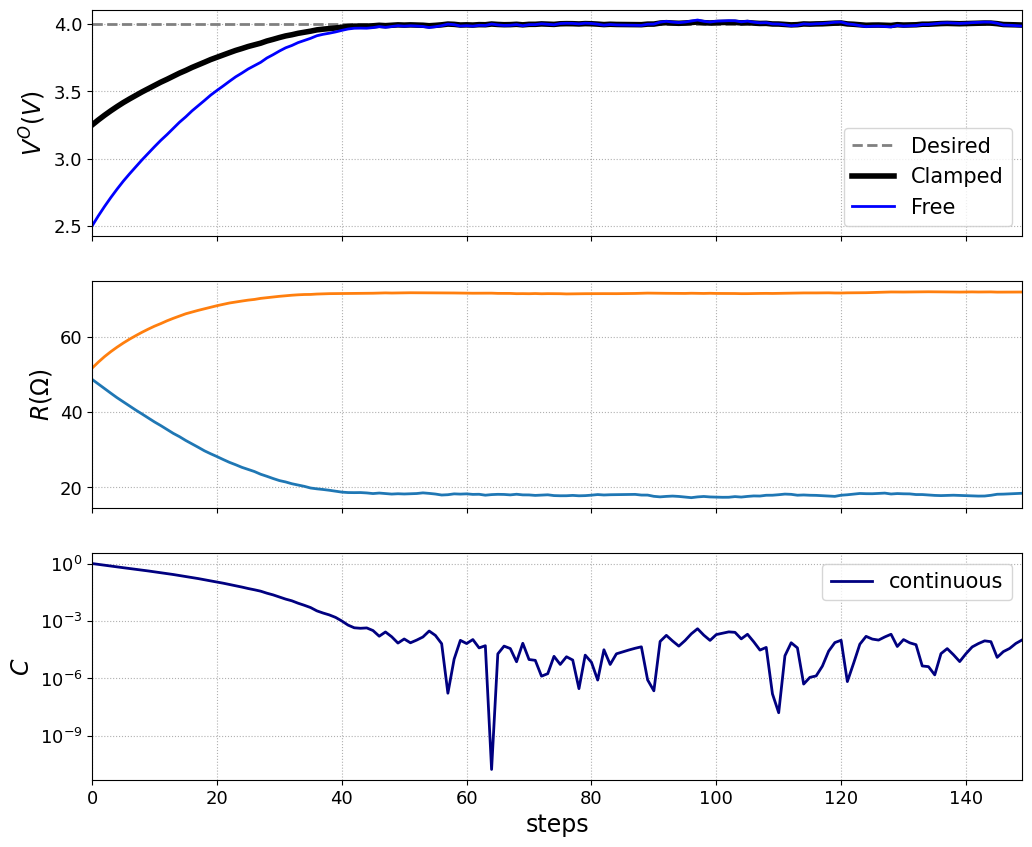

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (12,10))
plotting_functions.simple_plot_voltages(ax[0], rule = 'continuous')
plotting_functions.plot_resistances(ax[1], G2, rule = 'continuous')
plotting_functions.plot_mse(ax[2], fig, rule = 'continuous')

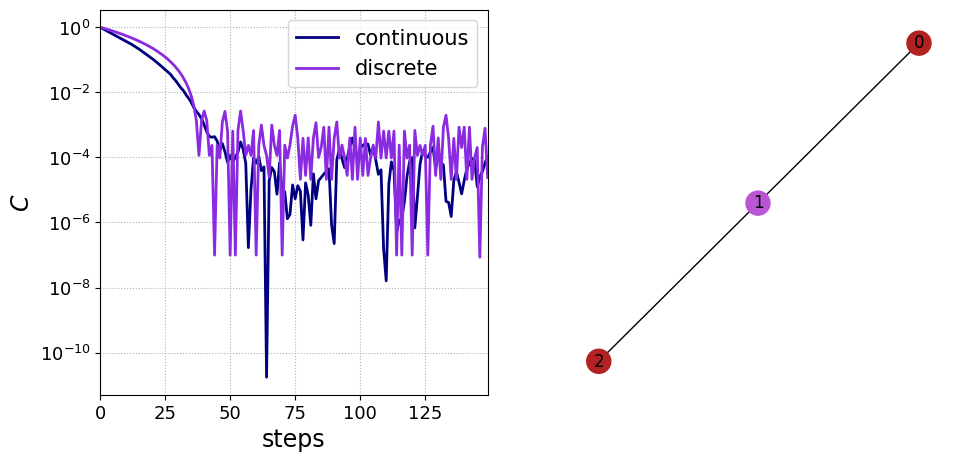

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (11,5))
plotting_functions.plot_graph(ax[1], fig, 'simple_graph')
plotting_functions.plot_mse(ax[0], fig, rule = 'continuous')
plotting_functions.plot_mse(ax[0], fig, rule = 'discrete')

TypeError: plot_resistances() missing 1 required positional argument: 'rule'

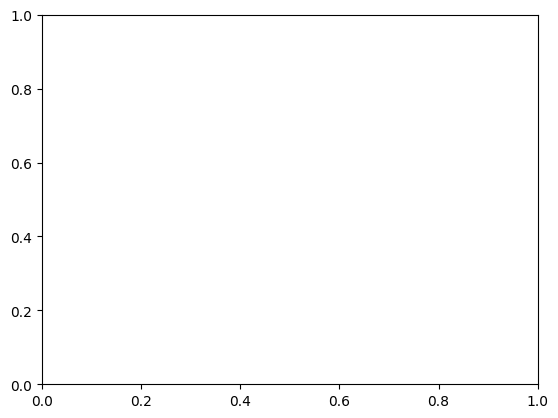

In [ ]:
fig, ax = plt.subplots()
plotting_functions.plot_resistances(ax, G1)

# for node in G1.nodes:
#     if G1.nodes[node]['type'] == 'target':
#         print(G1.nodes[node]['voltage'])